## The Plant Project - Data Analysis Report

by Rita, Tiago and Martin

### Decision on Datasets

[Plantvillage](https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset) is the main dataset we are using. It contains 256x256 pixel JPG images (colorspace RGB) for a variety of plants as well as examples of healthy ones and plants with deseases. 

Add first, we also took an additional dataset into account: [new-plant-diseases-dataset](https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset) as it matches a subset of the image IDs from "Plantvillage" and for those it adds rotated variations but also duplicates. Because not all images of "Plantvillage" are covered by the rotated variations we decided to drop "new-plant-diseases-dataset" as not much new information was added. If it seems benefical for training a model later on, we can at any time add image rotations programmatically by ourselves. 

We ignored all other mentioned datasets from the task document.

In [44]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
# Images path
folder_color = 'dataset/color'
folder_gray = 'dataset/grayscale'
folder_segmented = 'dataset/segmented'

# Gets the name of all folders in the directory
sub_folders_color = [name for name in os.listdir(folder_color)]
sub_folders_gray = [name for name in os.listdir(folder_gray)]
sub_folders_segmented = [name for name in os.listdir(folder_segmented)]


In [46]:
# Gets the number of items inside each folder in the directory

nums_color = []
nums_gray = []
nums_segmented = []

for name in sub_folders_color:
    nums_color.append(len(os.listdir(folder_color + "/" + name)))
for name in sub_folders_gray:
    nums_gray.append(len(os.listdir(folder_gray + "/" + name)))
for name in sub_folders_segmented:
    nums_segmented.append(len(os.listdir(folder_segmented + "/" + name)))


### Metadata

The metadata of the dataset is encoded in the names of the subfolder, e.g. the "Apple___Apple_scab"-folder contains images of the plant "Apple" with the specific desease "Apple_scab". Images that are considered to display a healthy plant are also stored in this structure, e.g. "Apple___healthy" contains only images of disease-free apples. Each JPG-file contains as filename a unique ID. The IDs across color, gray and segmented match which makes it easy to combine them. Besides their name the JPG files do not contain any other metadata (such as EXIF).

For further analysis we create a DataFrame where each record represents one subfolder.

In [47]:
# Organize the data into DataFrames
df_color = pd.DataFrame()
df_color['Name'] = sub_folders_color
df_color['Count'] = nums_color
df_color['Dataset'] = 'color'

df_gray = pd.DataFrame()
df_gray['Name'] = sub_folders_gray
df_gray['Count'] = nums_gray
df_gray['Dataset'] = 'grayscale'

df_segmented = pd.DataFrame()
df_segmented['Name'] = sub_folders_segmented
df_segmented['Count'] = nums_segmented
df_segmented['Dataset'] = 'segmented'


In [48]:
# Add the 3 similar daaframes together
df = pd.concat([df_color, df_gray, df_segmented], ignore_index=True)


df['Plant'] = df.Name.str.split(pat='__').str[0] # getting the name of the plant
df['Status'] = df.Name.str.split(pat='__').str[1] # getting the disease of the plant
df.Plant.unique()


array(['Strawberry', 'Grape', 'Potato', 'Blueberry', 'Corn_(maize)',
       'Tomato', 'Peach', 'Pepper,_bell', 'Orange',
       'Cherry_(including_sour)', 'Apple', 'Raspberry', 'Squash',
       'Soybean'], dtype=object)

In [49]:
df.Plant.replace(to_replace=['Cherry_(including_sour)','Corn_(maize)', 'Pepper,_bell'], 
                 value=['Cherry', 'Corn', 'Bell pepper'], inplace=True)

df.Status.unique()


array(['_healthy', '_Black_rot', '_Early_blight', '_Target_Spot',
       '_Late_blight', '_Tomato_mosaic_virus',
       '_Haunglongbing_(Citrus_greening)', '_Leaf_Mold',
       '_Leaf_blight_(Isariopsis_Leaf_Spot)', '_Powdery_mildew',
       '_Cedar_apple_rust', '_Bacterial_spot', '_Common_rust_',
       '_Esca_(Black_Measles)', '_Tomato_Yellow_Leaf_Curl_Virus',
       '_Apple_scab', '_Northern_Leaf_Blight',
       '_Spider_mites Two-spotted_spider_mite', '_Septoria_leaf_spot',
       '_Cercospora_leaf_spot Gray_leaf_spot', '_Leaf_scorch'],
      dtype=object)

In [57]:
df.Status.replace(to_replace = ['_Apple_scab', '_Black_rot', '_Cedar_apple_rust', '_healthy',
       '_Powdery_mildew', '_Cercospora_leaf_spot Gray_leaf_spot',
       '_Common_rust_', '_Northern_Leaf_Blight', '_Esca_(Black_Measles)',
       '_Leaf_blight_(Isariopsis_Leaf_Spot)',
       '_Haunglongbing_(Citrus_greening)', '_Bacterial_spot',
       '_Early_blight', '_Late_blight', '_Leaf_scorch', '_Leaf_Mold',
       '_Septoria_leaf_spot', '_Spider_mites Two-spotted_spider_mite',
       '_Target_Spot', '_Tomato_mosaic_virus',
       '_Tomato_Yellow_Leaf_Curl_Virus'],
value = ['Apple scab', 'Black rot', 'Cedar apple rust', 'Healthy',
       'Powdery mildew', 'Gray leaf spot',
       'Common rust', 'Northern leaf blight', 'Esca (Black Measles)',
       'Isariopsis leaf spot',
       'Citrus greening', 'Bacterial spot',
       'Early blight', 'Late blight', 'Leaf scorch', 'Leaf mold',
       'Septoria leaf spot', 'Two-spotted spider mites',
       'Target spot', 'Mosaic virus',
       'Yellow leaf curl virus'], 
 inplace=True)
df.head(10)


,Name,Count,Dataset,Plant,Status
0,Strawberry___healthy,456,color,Strawberry,Healthy
1,Grape___Black_rot,1180,color,Grape,Black rot
2,Potato___Early_blight,1000,color,Potato,Early blight
3,Blueberry___healthy,1502,color,Blueberry,Healthy
4,Corn_(maize)___healthy,1162,color,Corn,Healthy
5,Tomato___Target_Spot,1404,color,Tomato,Target spot
6,Peach___healthy,360,color,Peach,Healthy
7,Potato___Late_blight,1000,color,Potato,Late blight
8,Tomato___Late_blight,1909,color,Tomato,Late blight
9,Tomato___Tomato_mosaic_virus,373,color,Tomato,Mosaic virus


In [58]:
df.sort_values(by = 'Name')

,Name,Count,Dataset,Plant,Status
101,Apple___Apple_scab,630,segmented,Apple,Apple scab
63,Apple___Apple_scab,630,grayscale,Apple,Apple scab
25,Apple___Apple_scab,630,color,Apple,Apple scab
109,Apple___Black_rot,621,segmented,Apple,Black rot
71,Apple___Black_rot,621,grayscale,Apple,Black rot
...,...,...,...,...,...
47,Tomato___Tomato_mosaic_virus,373,grayscale,Tomato,Mosaic virus
9,Tomato___Tomato_mosaic_virus,373,color,Tomato,Mosaic virus
22,Tomato___healthy,1591,color,Tomato,Healthy
60,Tomato___healthy,1591,grayscale,Tomato,Healthy


Overall number of images: 162916


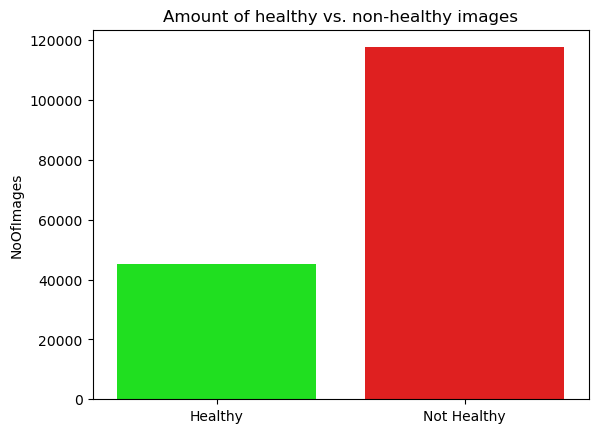

In [60]:
print("Overall number of images:", df.Count.sum())

# distribution of healthy vs. non-healthy images
distribution = [df[df['Status'] == 'Healthy'].Count.sum(), df[df['Status'] != 'Healthy'].Count.sum()]
df_dist = pd.DataFrame(distribution, columns=['NoOfImages'], index=['Healthy', 'Not Healthy'])

plt.title('Amount of healthy vs. non-healthy images');
colors = ['#00ff00', '#ff0000']
sns.barplot(x=df_dist.index, y=df_dist.NoOfImages, palette=colors);

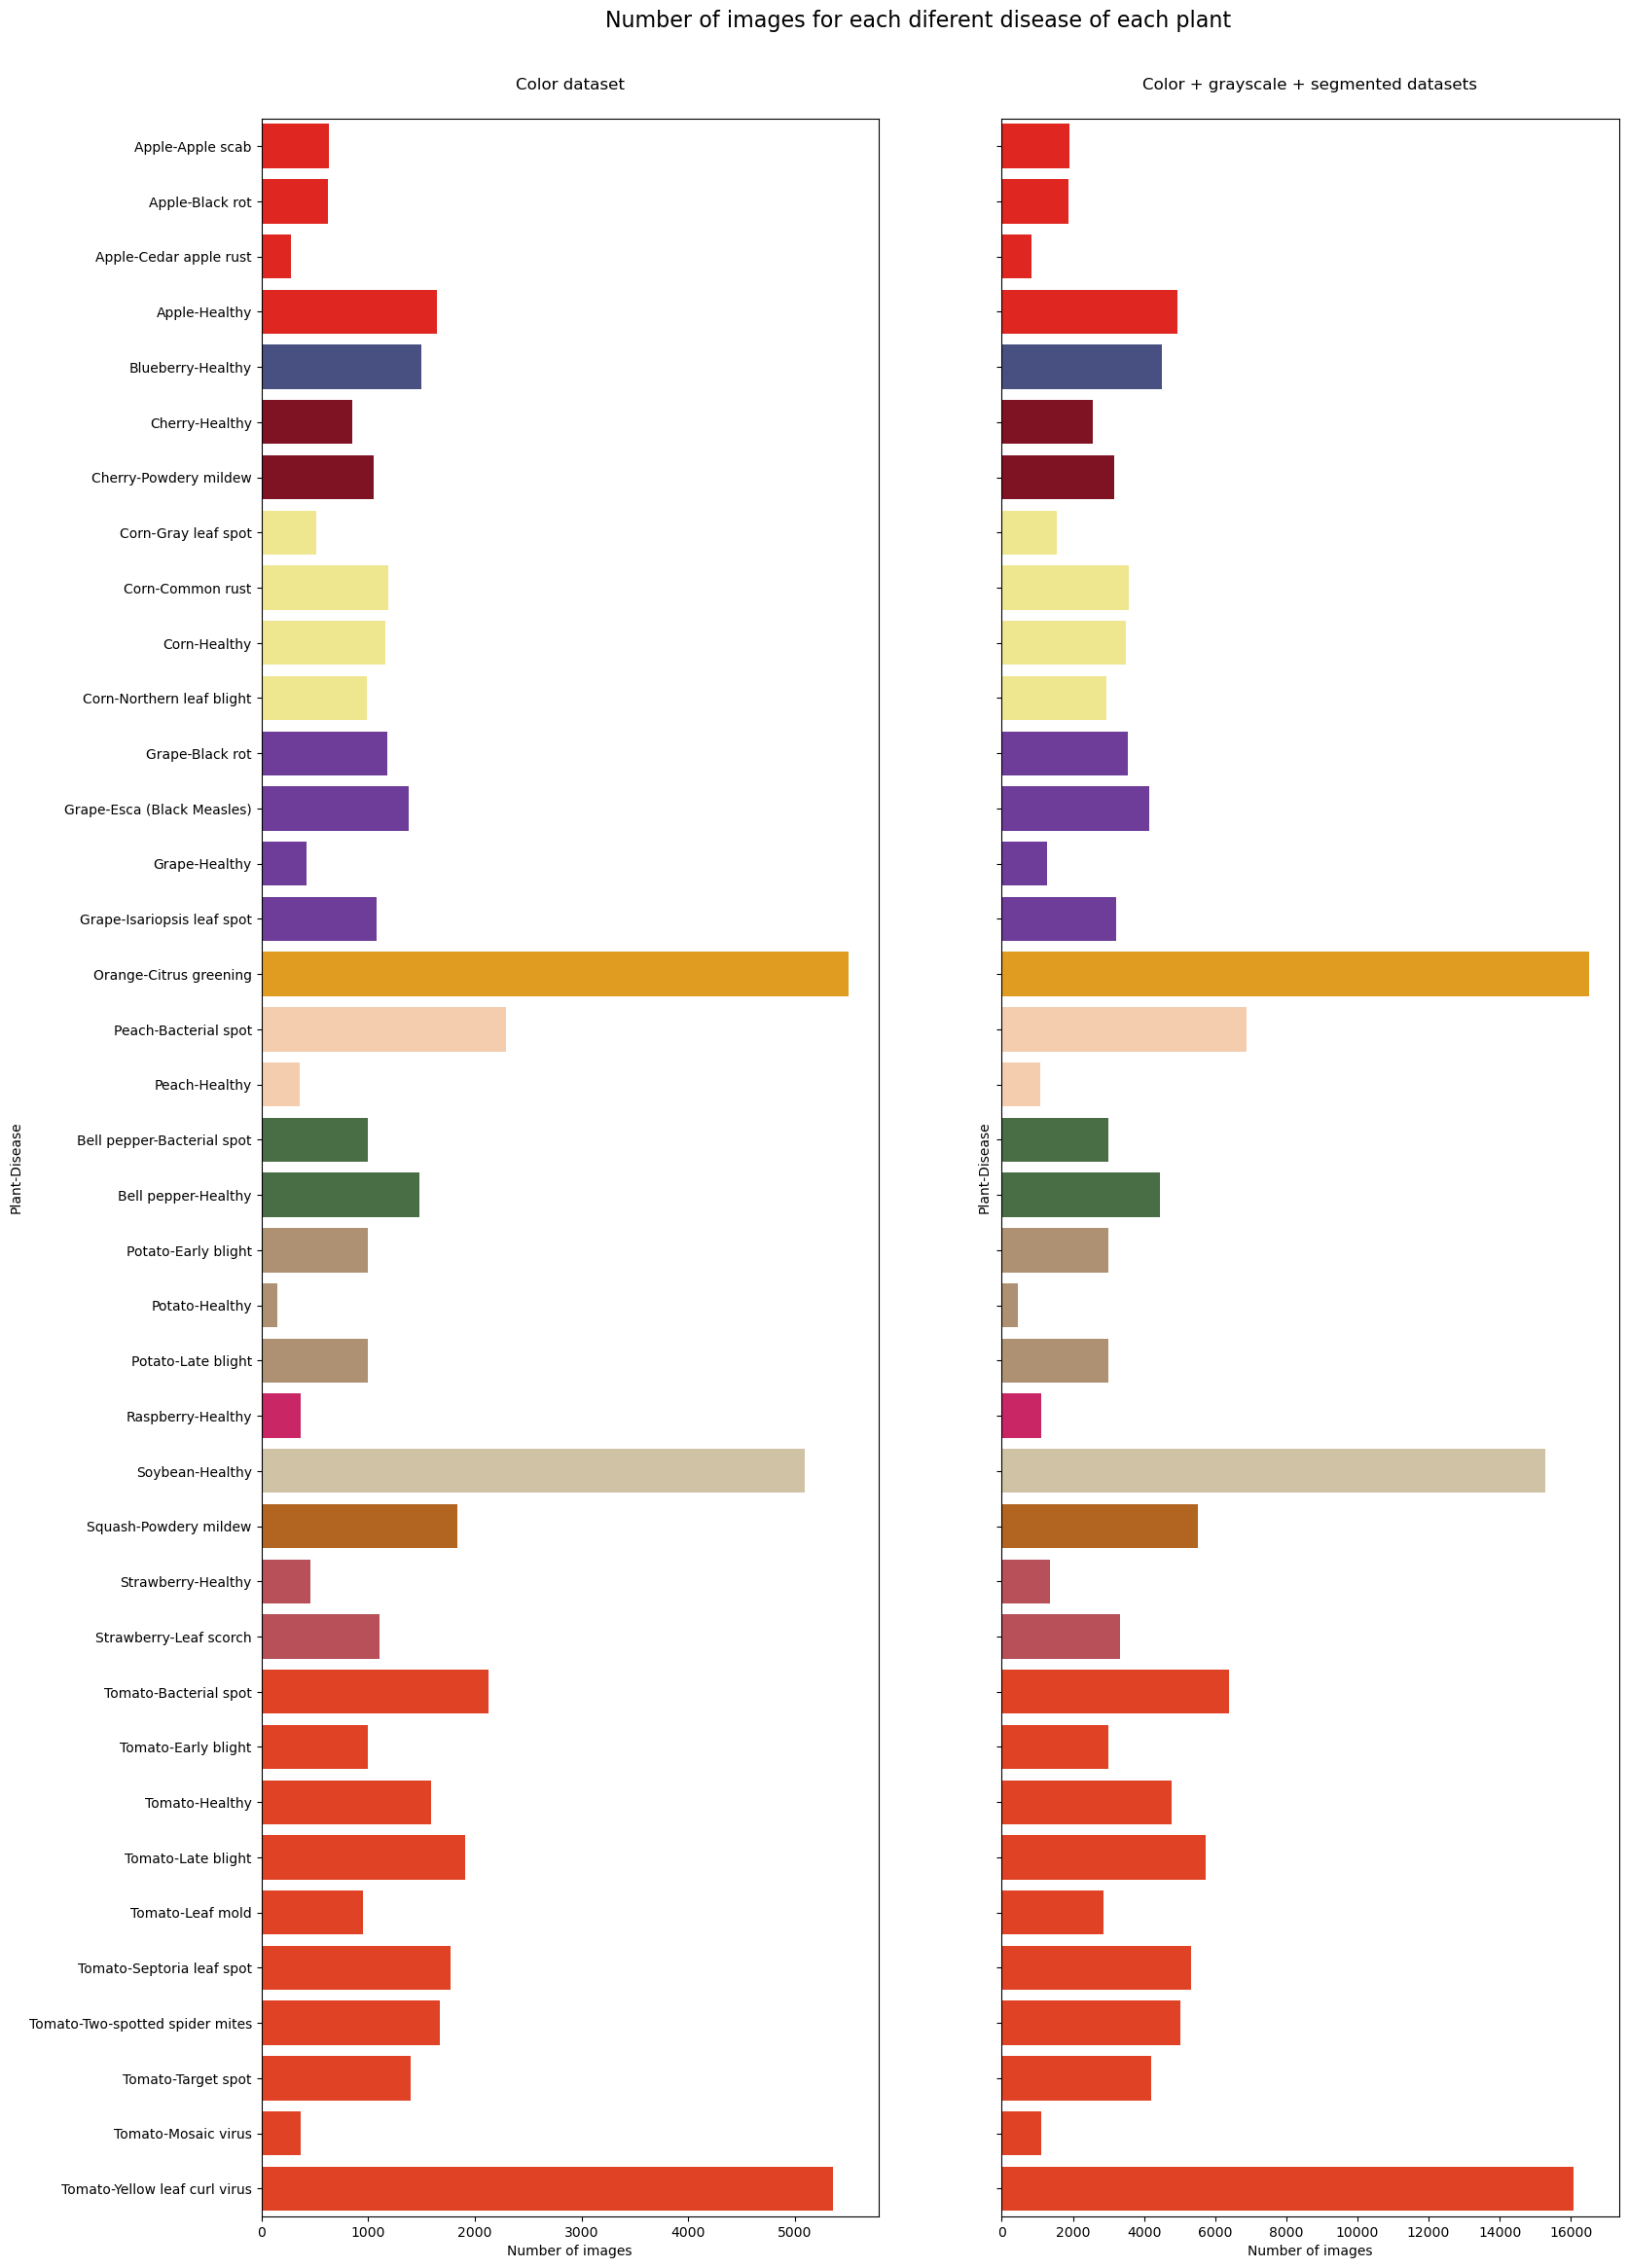

In [343]:
# Number of images of each disease: color dataset
df_2 = df.loc[(df.Dataset == 'color'),['Plant', 'Status', 'Dataset', 'Count']]
df_2['Plantstat'] = df_2['Plant'] + '-' + df_2['Status']

colors = ['#ff0800', '#ff0800', '#ff0800', '#ff0800', '#3E4989', '#910118', '#910118', '#FFF380',
          '#FFF380', '#FFF380', '#FFF380', '#6f2da8', '#6f2da8', '#6f2da8', '#6f2da8','#FFA500',
          '#ffcba4', '#ffcba4', '#44743d', '#44743d', '#b79268', '#b79268', '#b79268','#e30b5d',
          '#d7c49e', '#CA6309', '#c83f49', '#c83f49', '#ff2c06', '#ff2c06', '#ff2c06', '#ff2c06',
          '#ff2c06', '#ff2c06', '#ff2c06', '#ff2c06', '#ff2c06', '#ff2c06']
f, axes = plt.subplots(1, 2, figsize=(18, 28), sharey=True)
plt.suptitle('Number of images for each diferent disease of each plant', fontsize=16, y=0.92)
sns.barplot(y=df_2.Plantstat, x=df_2.Count, palette = colors, ax=axes[0])
axes[0].set_title('Color dataset', y = 1.01)
axes[0].set_ylabel('Plant-Disease')
axes[0].set_xlabel('Number of images')

# Number of images of each disease: color + grayscale + segmented datasets
df['Plantstat'] = df['Plant'] + '-' + df['Status']
df_g2 = df.groupby('Plantstat', sort=False).agg({'Count': 'sum'})

df_2 = df.loc[(df.Dataset == 'color'),['Plant', 'Status', 'Dataset', 'Count']]
df_2['Plantstat'] = df_2['Plant'] + '-' + df_2['Status']
sns.barplot(y=df_g2.index, x=df_g2.Count, palette = colors, ax=axes[1])
axes[1].set_title('Color + grayscale + segmented datasets', y = 1.01)
axes[1].set_xlabel('Number of images')
axes[1].set_ylabel('Plant-Disease');


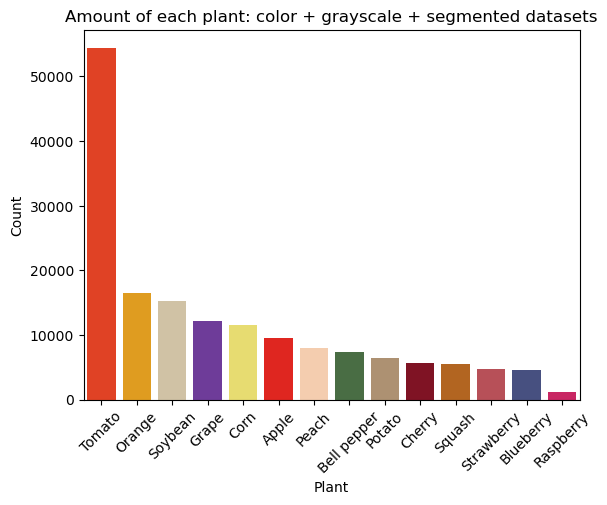

In [344]:
# Number of images of each plant: color + grayscale + segmented datasets

df_g = df.groupby('Plant').agg({'Count': 'sum'}).sort_values(by='Count', ascending=False)
colors = ['#ff2c06', '#FFA500', '#d7c49e', '#6f2da8', '#fbec5d', '#ff0800', '#ffcba4', '#44743d', '#b79268', 
          '#910118', '#CA6309', '#c83f49', '#3E4989', '#E30B5C']
sns.barplot(x=df_g.index, y=df_g.Count, palette=colors)
plt.xticks(rotation=45)
plt.title('Amount of each plant: color + grayscale + segmented datasets');

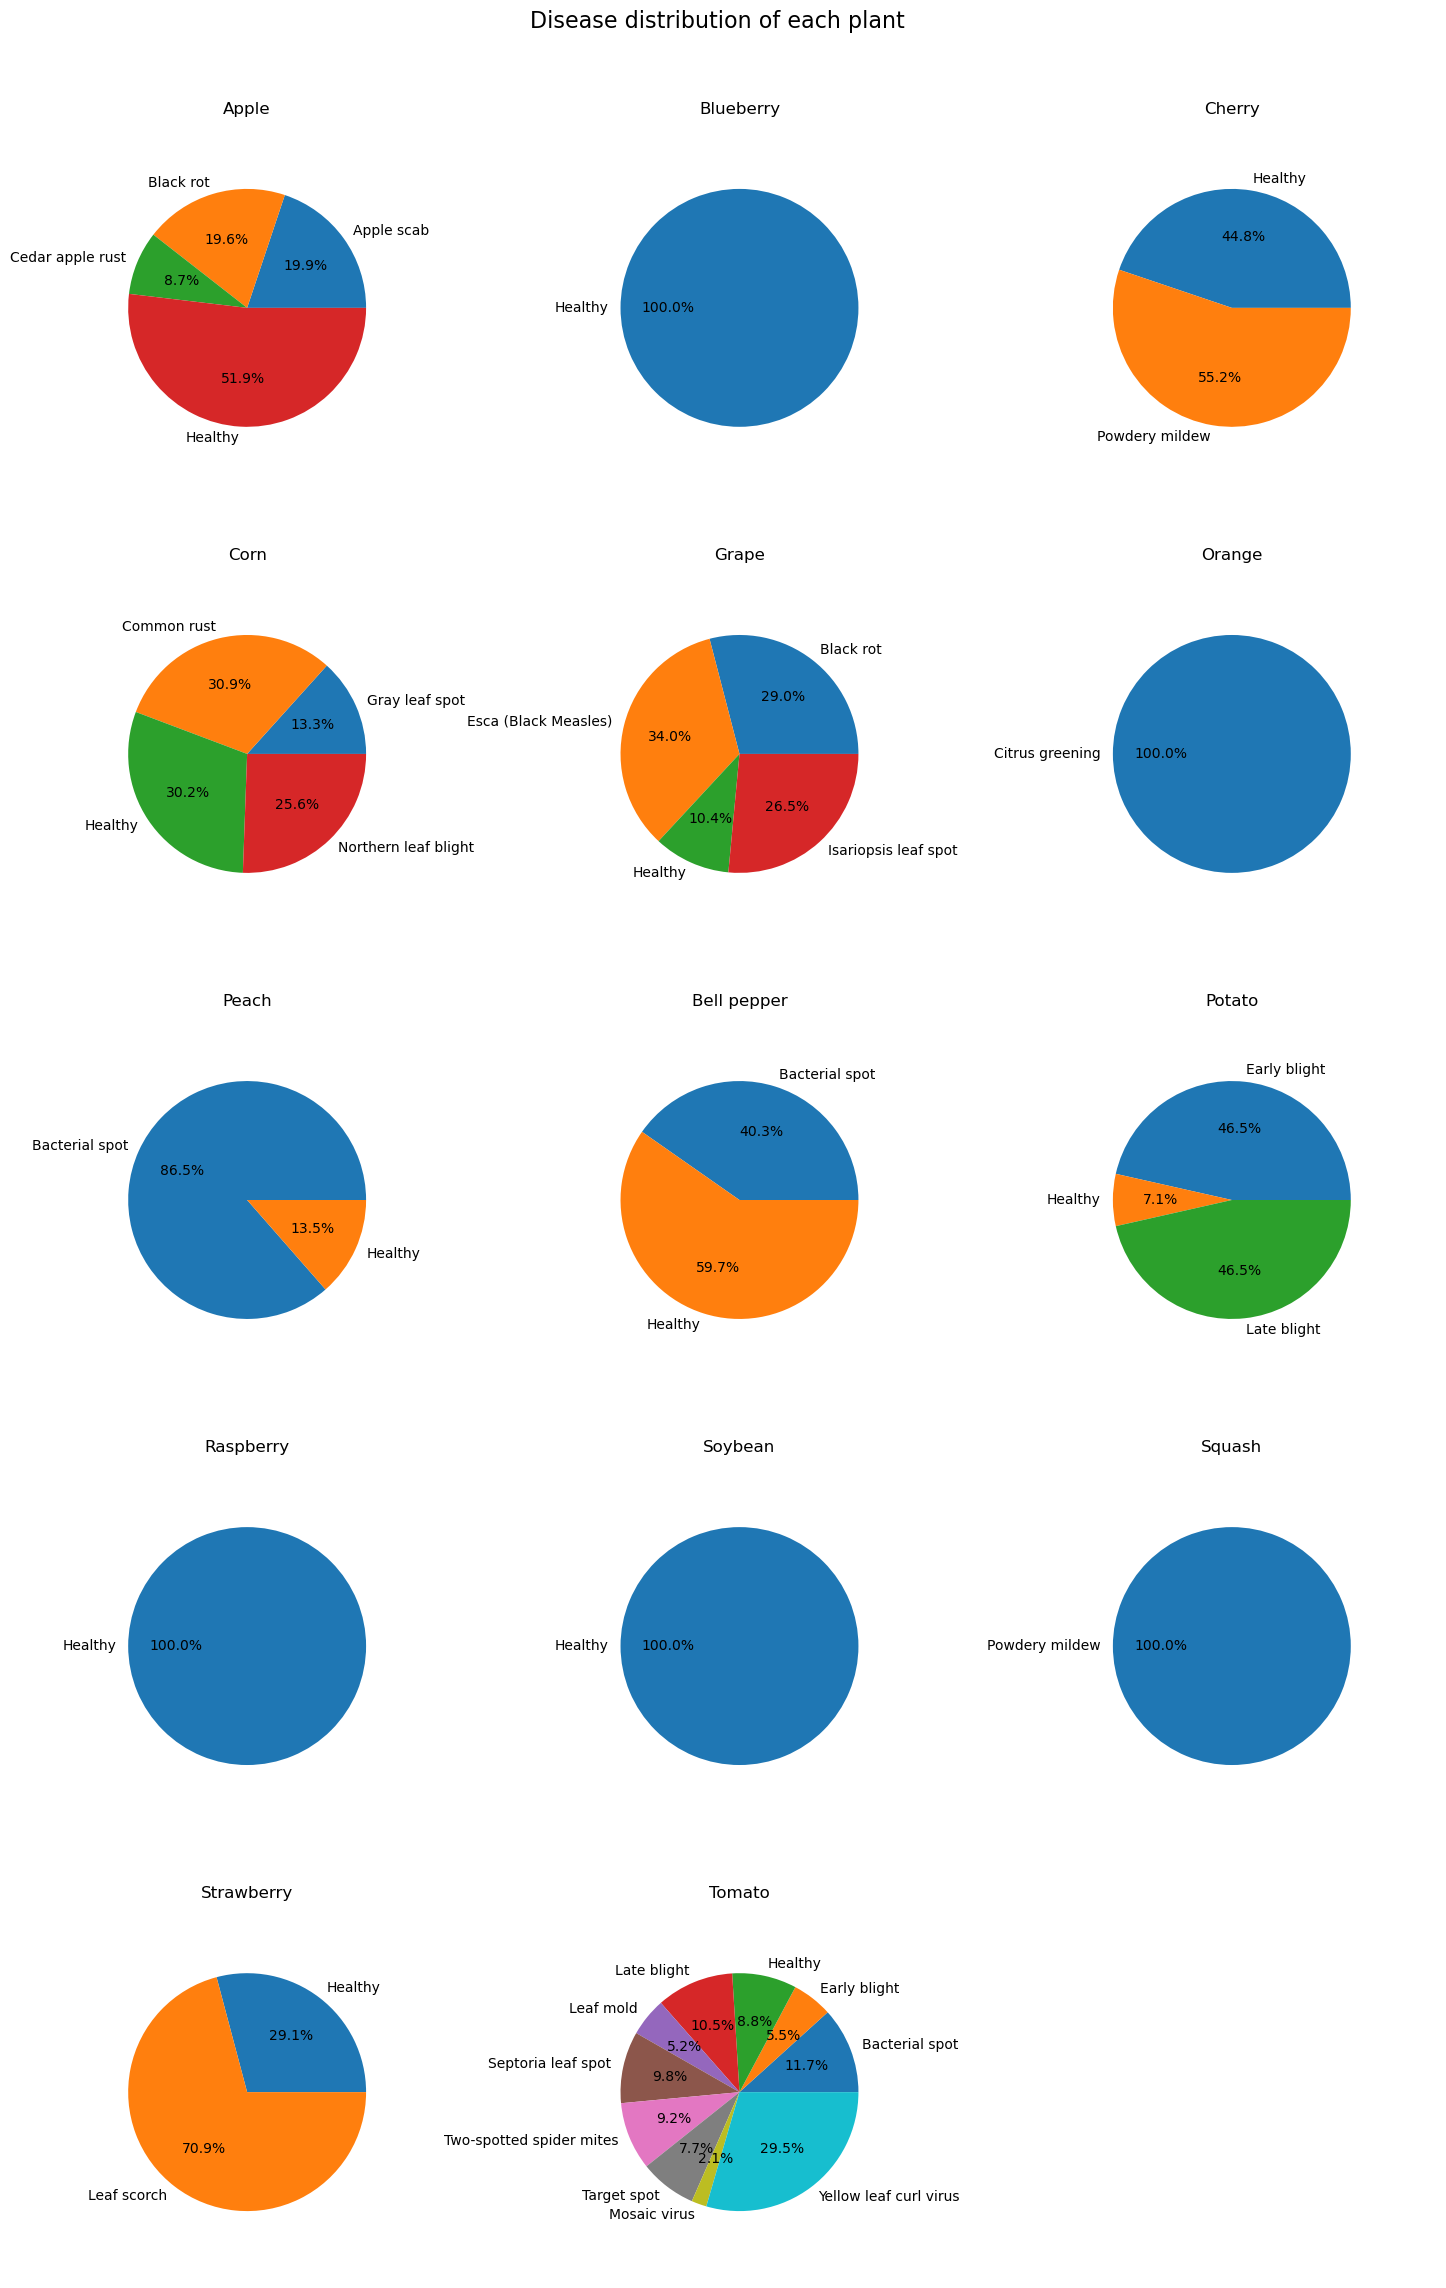

In [305]:
# Creates a dictionary with each plant and the possible diseases
dic = {}
for plant in df.Plant.unique():
    dic[plant] = df.loc[(df.Plant == plant)].Status.unique()
    
# Pie charts for each plant with their diseases

f, axes = plt.subplots(5, 3, figsize=(18, 28))
plt.suptitle('Disease distribution of each plant', fontsize=16, y=0.92)
col = 0
row = 0
for plant in dic:
    count = []
    for status in dic.get(plant):
        count.append(df.loc[(df.Plant == plant) & (df.Status == status), 'Count'].values[0])
    axes[row, col].pie(count, labels=dic.get(plant),  autopct='%1.1f%%', radius=0.8)
    axes[row, col].set_title(plant);
    col += 1
    if col%3 == 0:
        col = 0
        row += 1
       
axes[4,2].set_axis_off()

